# Report
## This is the report for the dataset and the end result visualizations for the volume prediction.

------

## Dataset:

* #### Passenger id: 
We could measure the discreet rides per time-frame but for the 1 hour prediction window that was chosen it makes no sense. Hence this column is dropped

* #### Source & Destination Coordinate columns (2 pairs): 
The range of the coordinates was scanned in order to verify that all the values represent calls from Lima city and outskirts. A first idea was to use the osm routing library to approximate the cumulative distance traveled per hour normalize it and use it as a feature. Since every routing calculation took about 1.4 seconds and we had >2mil rows, that effort was abandoned. A cheaper and less trustworthy approach would be to just take the straight distance between source and destination. Eventually, these columns where also dropped. 

* #### Address: 
The address plays a big role in defining which areas of the city have a certain volume per hour. An idea could be to find a dataset that encodes these locations and use the result after encoding as a feature. Since our dataset only had the address though, the column was dropped. 

* #### Date: 
The date is transformed into a pandas time-stamp and will produce several features that will showcase the seasonality of the time series. It is apparent that the problem lies in modeling the behavior of the particular city's taxi system in comparison to a specific date-time. It should be noted that some days like 25 of December. 


-----

# Statistical analysis:


### Seasonality:
Our time series has a profound seasonality since the ride volume is bound by the specific hour and day, but also seasonal events like Christmas (25Dec) or a Empire of the Sun consert (17 Nov 2015) .

### Outliers? :
Hence, we can detect outliers by the z-score and a threshold, but it's not a good idea since we are producing time lags and possibly removing seasonal events that should be predicted.

Also, I verified that the bounding box of the coordinates was indeed encapsulating Lima, Peru, and there were no "rogue rides".

---

### Stationarity:
We must also test to see if the time series is stationary. This was done by performing the Dickey-Fuller test as shown in notebook 1b. 

The result was that for this dataset, the time series is stationary so no standardising was required.

This was also proven by the fact that the rolling mean follows the rolling stf throughout the dataset.

---



---

# Features:

We need to encode the timestamp we have in each ride in a set of features that will encapsulate the seasonality of our timeseries.

The features that were created where the ones bellow:

* day_of_year
* day_of_week
* month_of_year
* hour_of_day
* minute_of_hour

Of course, if we aggregate by hour, we will drop the minute of hour feature.

### There is a strong correlation between the hour and day of the week and the ride volume.


---


## Per month model training:
 Finally, in order to achieve a good prediction, we should train our model based on the specific month that we want to predict.

## Aggregation:

In order to predict by the chosen timeframe of 1 hour, the dataset was aggregated and saved in a Pandas Dataframe .pickled format


---- 

## Project Structure:

* data
    * raw: raw csv data
    * aggregated: aggregated pickled pandas Dataframes
    

* notebook : Jupyter notebooks


* src
    * preparation: Fetch & Evaluate the dataset.
    * processing: Aggregations and Statistical Analysis
    * modeling: Model Creation & Evaluation
    
    
* test
    * test_modeling
    * test_preparation
    * test_processing


# Models:

In order to showcase both a statistic driven model and a Deep learning model. The SARIMA approach and the LSTM model were chosen.

For each one, a model() class was created. Both of these classes could be a subclass of a parent model() class, but since the LSTM required radically more complex functionality, this was not chosen.

Both of the model's showcases and visualizations can be found in their respective Jupyter notebooks.

---


## SARIMA approach results:


The SARIMA statistical model stands for Seasonal Autoregressive Moving Average.
All the model's optimisation and evaluation is shown in the 2a notebook.

Bellow there are some visualisations of the model:


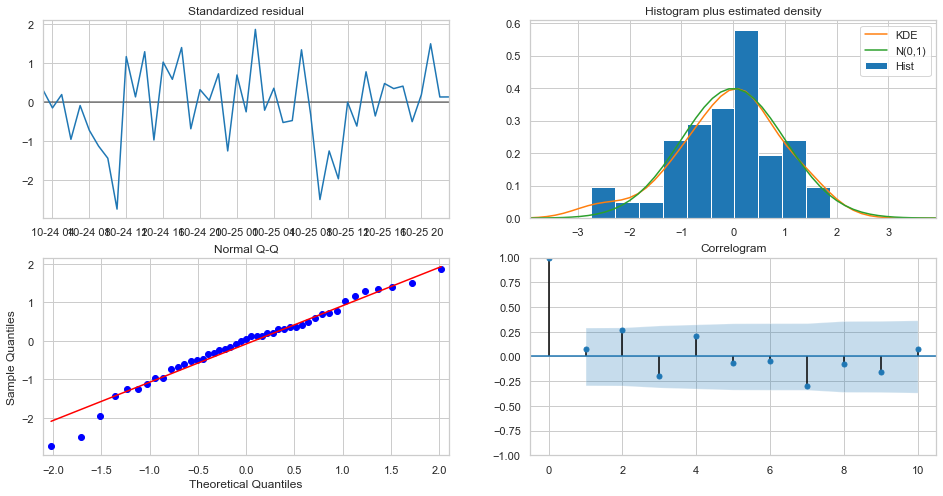





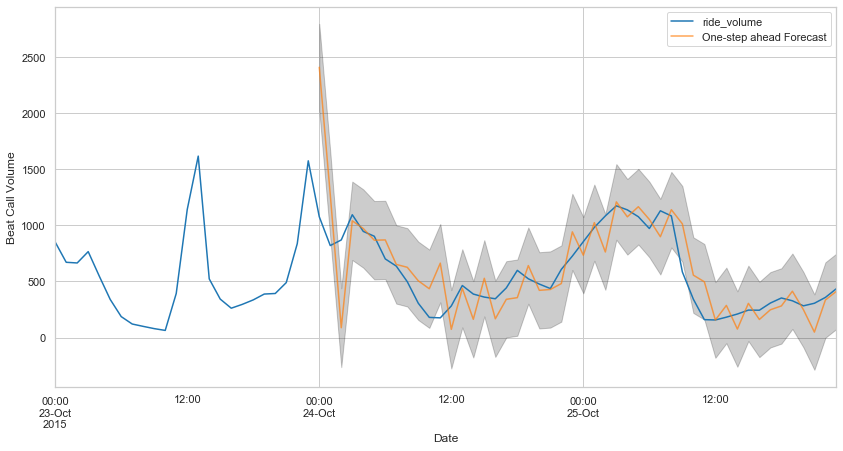


## LSTM Model results:

For the LSTM Model since we wanted to predict a series of hourly volumes based on previous values, 

### Many-to-one architecture:

The current class can take an arbitary size of the lookback window and produce a single prediction of the ride volume for the next hour. 

By shifting the windows forward, we can predict a series of ride volumes, for a given day for example.

### Hyperparameters:
The Hyperparameters were not optimised but some of them are straight forward such as the 'relu' activation on the end of the network, and the correct input-output shape to achieve a many-to-one behaviour.

### Visualisations:

Below we can see some predictions:


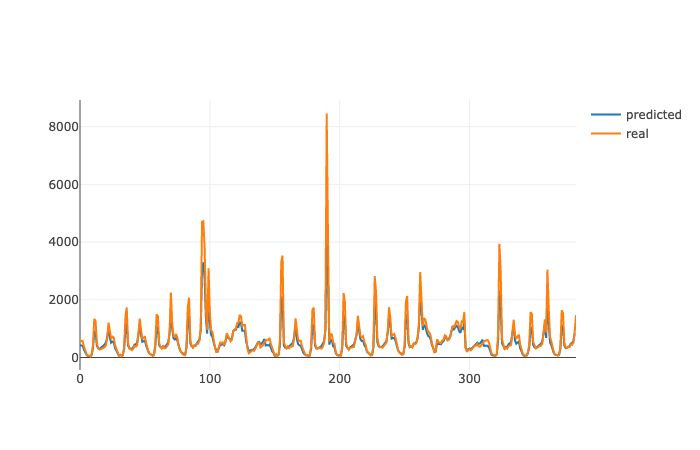



---
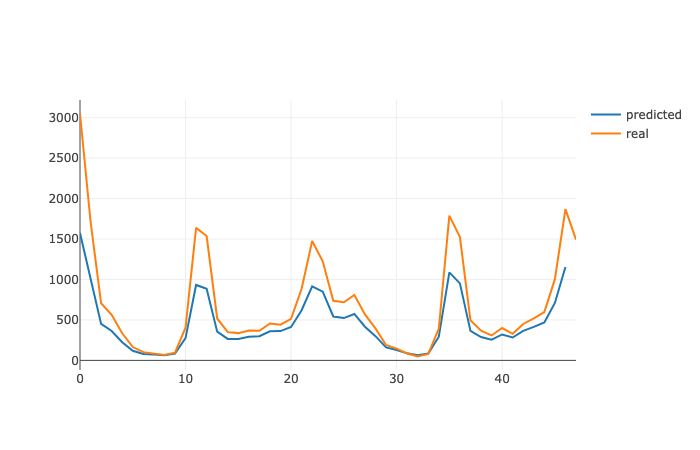

It's important that the model should be trained on the respective month, or specific days in order to produce good results.




Also, the Hyperparameter tuning and the optimization of the general architecture of the model should improve the above results.




# Final thoughts:

* Seasonality and Stationarity should be checked before we even consider trimming outliers.


* Some outliers may be linked to Seasonal events and should be accounted for.


* A model should be trained in regards to the specific date-time chosen to be predicted.


* A mechanism that checks the Min-Max, standard deviation and mean of the target dataset and decides if the model needs retraining should be incorporated for a microservice that uses this module.


* The SARIMA model predicted the ride volume more coarsly than the LSTM


* The LSTM showed some promising results, and with Hyperparameter tuning it should achieve an even higher score.


* A mock class VolumePredictor() was created as a future endpoint for a user to perform on demand predictions in as set date from multiple models.

# Thank you for following through =)